In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
im = plt.imread("mountain.jpg")

In [3]:
!ls

"ls" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.


In [3]:
im.shape

(177, 284, 3)

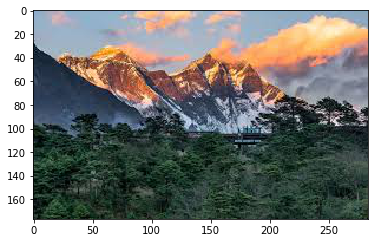

In [4]:
plt.imshow(im)
plt.show()

In [5]:
im_gray = im.mean(axis = 2)

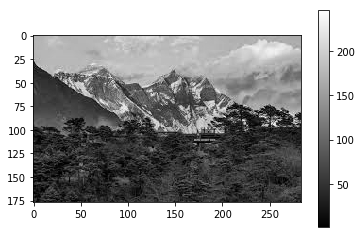

In [6]:
plt.imshow(im_gray, cmap = "gray")
plt.colorbar()
plt.show()

Simple operations with images.

In [7]:
im_gray.shape

(177, 284)

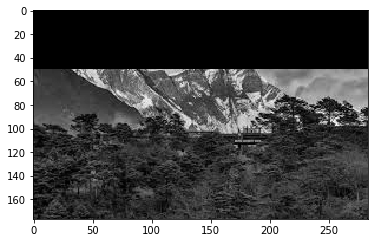

In [8]:
im2 = im_gray.copy()
im2[0:50,:] = 0
plt.imshow(im2, cmap = "gray")
plt.show()

In [9]:
lx, ly = im_gray.shape
X,Y = np.ogrid[0:lx, 0:ly]
print(X.shape, Y.shape)

(177, 1) (1, 284)


In [10]:
mask = ((X - lx/2)**2 + (Y - ly/2)**2 > 100**2)

In [12]:
#function to plot image in gray-scale
def plot(im):
    plt.imshow(im, cmap = "gray")
    plt.show()

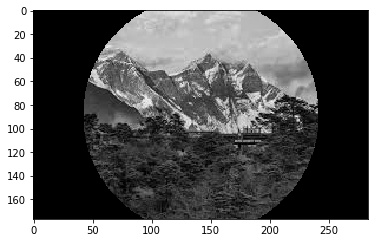

In [13]:
im2 = im_gray.copy()
im2[mask] = 0
plot(im2)

Histogram of the image shows distribution of pixel intensities.

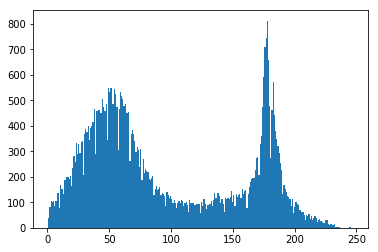

In [14]:
plt.hist(im_gray.ravel(), bins = 255)
plt.show()

We can select different image parts based on histogram peaks.

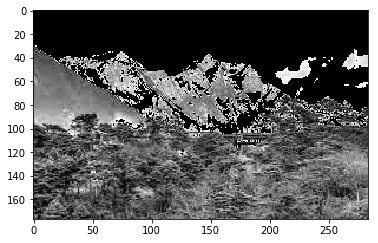

In [15]:
theta = 125
im2 = im_gray.copy()
im2[im2>theta] = 0
plot(im2)

Geometric image transformations

In [16]:
from scipy import ndimage

In [17]:
def mapping(coord):
    x = coord[0]/lx
    y = coord[1]/ly
    #weird quadratic mapping
    return (lx*(np.sqrt(x**2 + y**2)/2), ly*(x*y))
    #return (2*coord[0] - coord[1], 
    #        3 * coord[0] + coord[1])

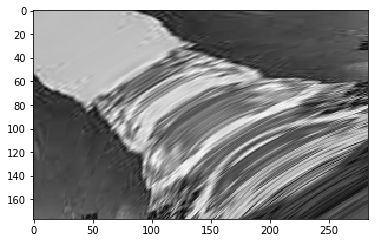

In [18]:
im2 = ndimage.geometric_transform(im_gray, mapping, order=5)
plot(im2)

Gaussian filters for image blurring

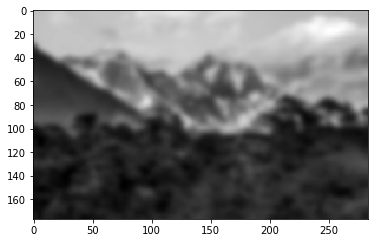

In [19]:
im2 = ndimage.gaussian_filter(im_gray, sigma = 2.5)
plot(im2)

Fourier image transforms

In [20]:
from scipy import fftpack

In [21]:
F_im = fftpack.fft2(im_gray)

Operations with complex numbers in numpy

In [22]:
x = np.array([1+2j, 3+1j])

In [23]:
x.real

array([1., 3.])

In [24]:
x.imag

array([2., 1.])

In [25]:
np.abs(x)

array([2.23606798, 3.16227766])

In [26]:
np.angle(x)

array([1.10714872, 0.32175055])

In [27]:
np.conj(x)

array([1.-2.j, 3.-1.j])

Plot of amplitude and phase of Fourier transform

In [28]:
F_shifted = fftpack.fftshift(F_im)

In [29]:
F_ampl = np.abs(F_shifted)
F_phase = np.angle(F_shifted)

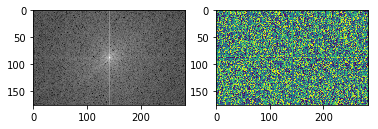

In [30]:
plt.figure()

plt.subplot(1,2,1)
plt.imshow(np.log(1 + F_ampl), cmap = "gray")

plt.subplot(1,2,2)
plt.imshow(F_phase)

plt.show()

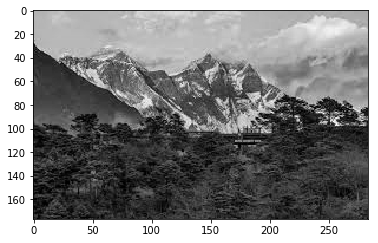

In [31]:
#inverse FT
F_inv = fftpack.ifft2(F_im)
plot(np.abs(F_inv))

Image deblurring with Wiener filter

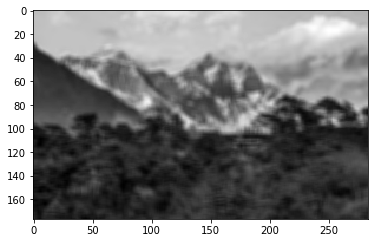

In [32]:
kernel = np.ones((5,5))/25
im_blur = ndimage.convolve(im_gray, kernel)
plot(im_blur)

In [33]:
kernel_padded = np.pad(kernel, 
                       [[0, lx - 5], [0, ly-5]], 
                       mode = "constant")

In [34]:
kernel_padded.shape

(177, 284)

In [35]:
F_kernel = fftpack.fft2(kernel_padded)
F_blur = fftpack.fft2(im_blur)

In [36]:
F_blur.shape

(177, 284)

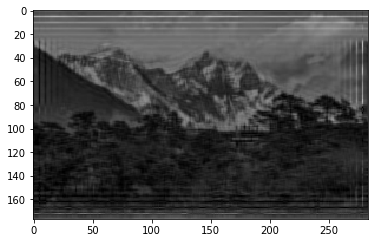

In [39]:
K = 1e-2
F_restored = F_blur * (np.conj(F_kernel) / (np.square(np.abs(F_kernel))+K))
im_restored = np.abs(fftpack.ifft2(F_restored))
plot(im_restored)

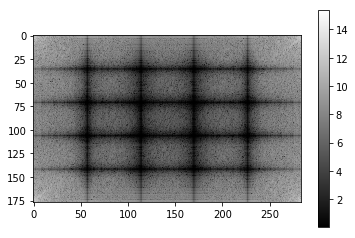

In [40]:
plt.imshow(np.log(1+np.abs(F_restored)), cmap = "gray")
plt.colorbar()

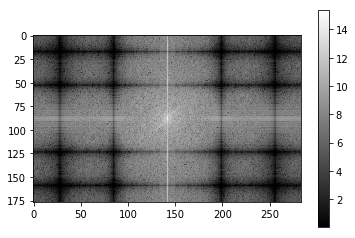

In [41]:
F_res_shift = fftpack.fftshift(F_restored)
plt.imshow(np.log(1+np.abs(F_res_shift)), cmap = "gray")
plt.colorbar()

Change of amplitude and phase for 2 images:

C:\Users\hunte\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


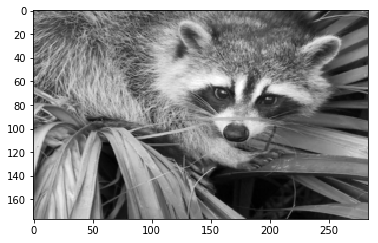

In [42]:
im2 = scipy.misc.face(gray = True)
face = scipy.misc.imresize(im2, (lx, ly))
plot(face)

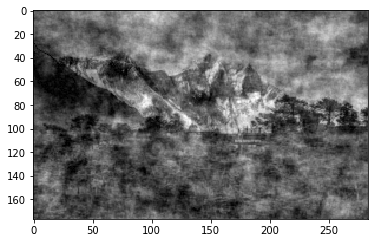

In [43]:
F_im = fftpack.fft2(im_gray)
F_face = fftpack.fft2(face)

im_ampl = np.abs(F_im)
im_phase = np.angle(F_im)

face_ampl = np.abs(F_face)
face_phase = np.angle(F_face)

F_res1_ampl = face_ampl
F_res1_phase = im_phase
F_res1 = F_res1_ampl * np.exp(1j * F_res1_phase)
res1 = fftpack.ifft2(F_res1)

plot(np.abs(res1))

#phase of mountain and amplitude of racoon

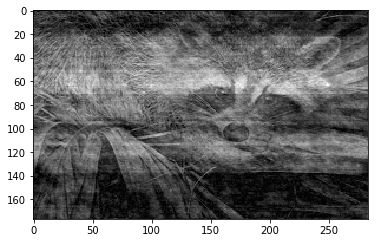

In [44]:
#phase of raccoon and amplitude of mountain
F_res1_ampl = im_ampl
F_res1_phase = face_phase
F_res1 = F_res1_ampl * np.exp(1j * F_res1_phase)
res1 = fftpack.ifft2(F_res1)

plot(np.abs(res1))